# Analyse Interval Analysis

In [11]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Run with `dakota -i ia.in`.

In [12]:
# Remove LHS* files
lhs_paths = Path.cwd().glob("LHS*")
for lhs_path in lhs_paths:
    lhs_path.unlink()

In [13]:
# Get all results in df
results_dfs = []
# For converting labels
# col_names = {
#     "ia_1p": "psepbqarmax",
#     "ia_2p": "fimp(14),\npsepbqarmax",
#     "ia_3p": "fimp(14),\npsepbqarmax,\ntriang",
# }

col_names = {
    "ia_3p": "min $R_{major}$",
    "ia_max_net_elec_3p": "max $P^{net}_{elec}$",
    "ia_min_div_load_3p": "min $P_{div}$",
}
# for results_path in Path.cwd().glob("*.dat"):
plot_paths = ["ia_3p.dat", "ia_max_net_elec_3p.dat", "ia_min_div_load_3p.dat"]
for results_path in [Path(plot_path) for plot_path in plot_paths]:
    study_results = pd.read_csv(results_path, sep=r"\s+")
    study_results["label"] = col_names[results_path.stem]
    results_dfs.append(study_results)

results = pd.concat(results_dfs)
results

,%eval_id,interface,fimp_14,psepbqarmax,triang,w,label
0,1,NO_ID,0.000078,9.158859,0.459291,0.321854,min $R_{major}$
1,2,NO_ID,0.000041,9.241441,0.583905,0.197365,min $R_{major}$
2,3,NO_ID,0.000076,8.725373,0.533985,0.350595,min $R_{major}$
3,4,NO_ID,0.000035,8.836645,0.550551,0.168179,min $R_{major}$
4,5,NO_ID,0.000007,8.986949,0.403947,0.128693,min $R_{major}$
...,...,...,...,...,...,...,...
155,156,NO_ID,0.000087,9.699975,0.535279,90749.474450,min $P_{div}$
156,157,NO_ID,0.000089,9.070396,0.535940,90730.354630,min $P_{div}$
157,158,NO_ID,0.000088,9.555586,0.551059,90645.180190,min $P_{div}$
158,159,NO_ID,0.000098,9.265844,0.437449,91297.618210,min $P_{div}$


In [14]:
# Investigate values
# results[results["label"] == "max $P^{net}_{elec}$"]["w"].describe()
results[results["label"] == "max $P^{net}_{elec}$"]

,%eval_id,interface,fimp_14,psepbqarmax,triang,w,label
0,1,NO_ID,0.000082,9.052968,0.459291,5.402717,max $P^{net}_{elec}$
1,2,NO_ID,0.000043,9.116493,0.583905,0.626716,max $P^{net}_{elec}$
2,3,NO_ID,0.000080,8.719517,0.533985,8.475528,max $P^{net}_{elec}$
3,4,NO_ID,0.000037,8.805112,0.550551,0.383172,max $P^{net}_{elec}$
4,5,NO_ID,0.000007,8.920730,0.403947,0.173819,max $P^{net}_{elec}$
...,...,...,...,...,...,...,...
130,131,NO_ID,0.000098,9.699975,0.545593,131760.716100,max $P^{net}_{elec}$
131,132,NO_ID,0.000098,9.699992,0.545264,131762.558200,max $P^{net}_{elec}$
132,133,NO_ID,0.000098,9.699992,0.545251,131762.601400,max $P^{net}_{elec}$
133,134,NO_ID,0.000098,9.699992,0.544218,131768.452100,max $P^{net}_{elec}$


/tmp/ipykernel_139237/3501363281.py:26: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axvline(x=0.0, linestyle="--", color="grey")


Text(0.2, -0.8, 'Failure')

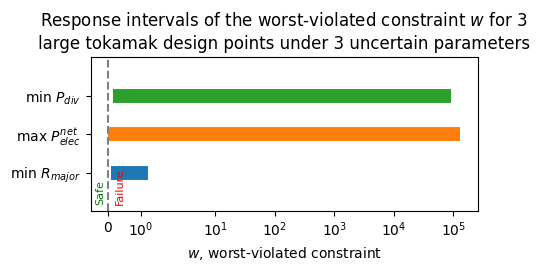

In [26]:
# Interval range
intervals = []
for label in results["label"].unique():
    w = results[results["label"] == label]["w"].to_numpy()
    intervals.append((w.min(), w.max(), label))

# Custom plot
fig, ax = plt.subplots(figsize=(5, 2.0))
n_intervals = len(intervals)
for i, (min, max, label) in enumerate(intervals):
    ax.hlines(
        y=label,
        xmin=min,
        xmax=max,
        color=f"C{i}",
        label=label,
        linewidth=10,
    )

ax.set_xlabel("$w$, worst-violated constraint")
ax.set_title(
    "Response intervals of the worst-violated constraint $w$ for 3\nlarge tokamak design points under 3 uncertain parameters"
)
ax.margins(y=0.5)
ax.set_xscale("symlog")
ax.axvline(x=0.0, linestyle="--", color="grey")
ax.annotate("Safe", xy=(-0.4, -0.8), rotation=90, size=8, color="g")
ax.annotate("Failure", xy=(0.2, -0.8), rotation=90, size=8, color="r")